# Summary

It seems that overfitting the small sample size is the biggest issue with fitting models to the dataset! The non-interacted lasso regression models performed the best which isn't too suprising given the small dataset. 

All the models seem to agree on the following things:

*Shot point is the best location and white rocks is the worst, a southwest wind is the best, the afternoon is the best time of day, and the fall is the best season and spring is the worst.*

Let's see if we can capture those ideas with some plots!

# Imports and data loading

In [1]:
# Filesystem
from google.colab import drive

# Data manipulation
from datetime import datetime
import pandas as pd
import numpy as np

# Analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('Set2')
plt.style.use('fivethirtyeight')
sns.set(rc={'figure.figsize':(10,5)})

# Model fitting
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
# Load from github

url = 'https://raw.githubusercontent.com/natelac/Great-Lakes-Fishing-Data-and-Analysis/main/data/'
df = pd.read_csv(url + 'fishing_by_date.csv');

In [3]:
# Load from colab

# drive.mount('/content/drive', force_remount=True);

# path_to_folder = 'drive/My Drive/Colab Notebooks/Fishing/data/'
# df = pd.read_csv(path_to_folder + 'fishing_by_date.csv');

# Final analysis

In [4]:
# Calculate features

# Calculate southwesterness
df['sw_wind'] = df['wind_dir'] - 225
df.sw_wind = abs(df.sw_wind)
df.sw_wind = df.sw_wind % 180
df.sw_wind = df.sw_wind / max(df.sw_wind)
df.sw_wind = 1 - df.sw_wind

# Controlled hook-rate (from data analysis)
df['hook_rate_ctrl'] = df['hook_rate'] / (0.19734954495663856 * df['crew_count'] + 1.2623066665134317)

In [5]:
# Make labelled so they plot well

# Make location 3 levels
# 'Shot Point', 'Other', 'White Rocks'
def location_levels(entry):
    if entry in ['Shot Point', 'White Rocks']:
        return entry
    else:
        return 'Other'
df['location_level'] = df['location'].apply(location_levels)

# Make season 3 levels
# 'Fall', 'Other', 'Spring'
def season_levels(entry):
    if entry == 'fall':
        return 'Fall'
    elif entry == 'spring':
        return 'Spring'
    else:
        return 'Other'
df['season_level'] = df['season'].apply(season_levels)

# Make time_period 2 levels
# 'Afternoon', 'Not Afternoon'
def time_period_levels(entry):
    if entry == 'afternoon':
        return 'Afternoon'
    else:
        return 'Not Afternoon'
df['time_period_level'] = df['time_period'].apply(time_period_levels)

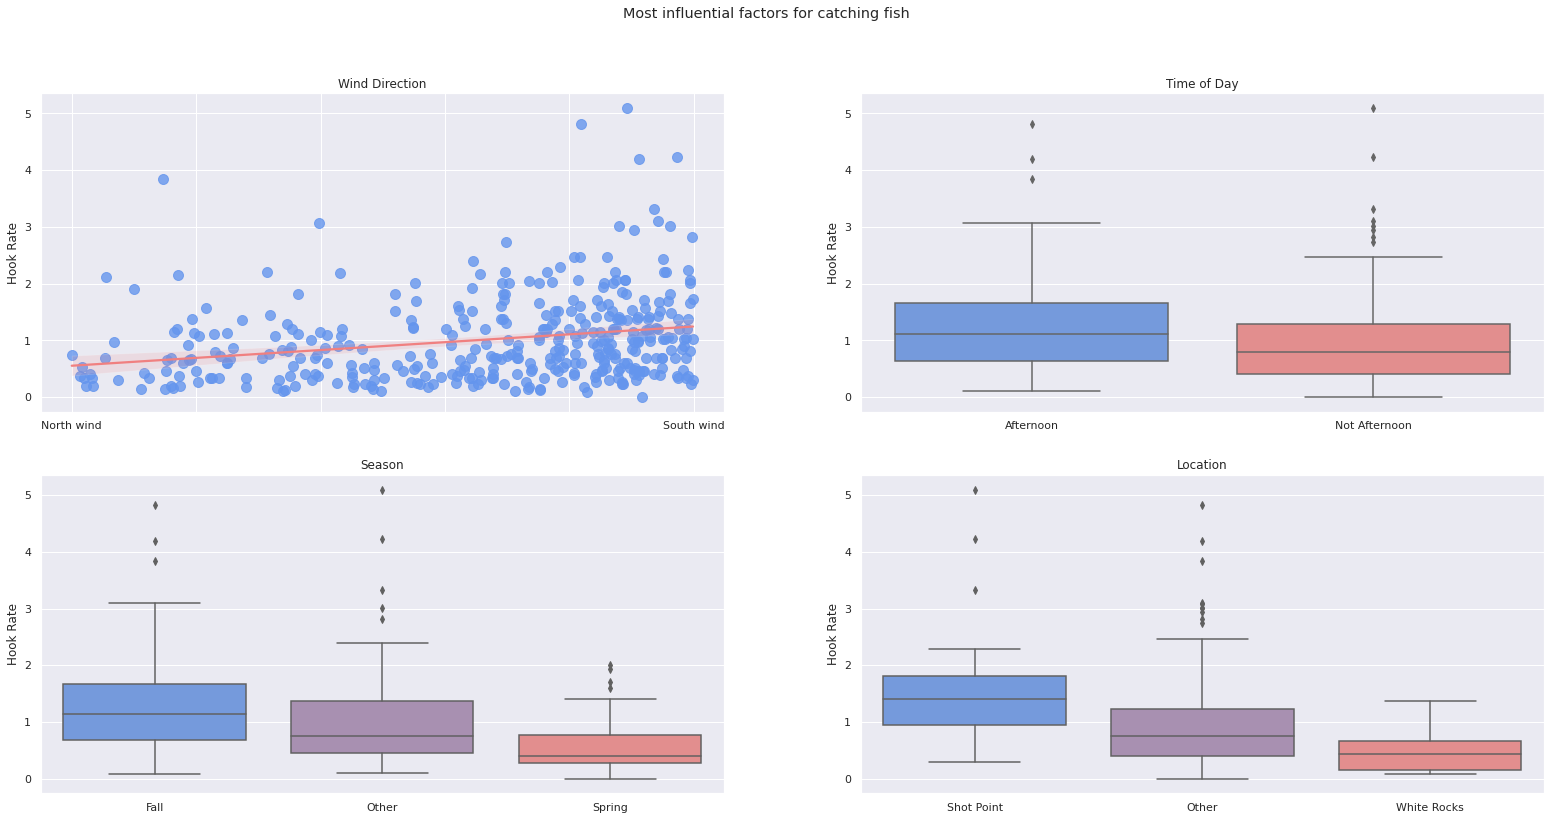

In [6]:
# Make a 4 ax plot for top features for predicting hook-rate

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(24, 12)
sns.set_palette(sns.color_palette("blend:cornflowerblue,lightcoral", 3))

# Scatterplot with line of best fit
sns.regplot(data=df, x='sw_wind', y='hook_rate_ctrl', ax=axs[0,0],
            line_kws={'color':'lightcoral'}, 
            scatter_kws={
                'color':'cornflowerblue', 
                's':100,
                'alpha':0.8})
axs[0,0].set_title('Wind Direction')
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Hook Rate')

# Re-label scatterplot ticks
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['North wind', '', '', '', '', 'South wind']
axs[0,0].set_xticks(ticks)
axs[0,0].set_xticklabels(labels)

# Box plot for time period
sns.boxplot(data=df, x='time_period_level', y='hook_rate_ctrl', ax=axs[0,1],
            order=['Afternoon', 'Not Afternoon'],
            palette=['cornflowerblue', 'lightcoral', ])
axs[0,1].set_title('Time of Day')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('Hook Rate')

# Box plot season
sns.boxplot(data=df, x='season_level', y='hook_rate_ctrl', ax=axs[1,0],
            order=['Fall', 'Other', 'Spring'])
axs[1,0].set_title('Season')
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('Hook Rate')

# Box plot location
sns.boxplot(data=df, x='location_level', y='hook_rate_ctrl', ax=axs[1,1],
            order=['Shot Point', 'Other', 'White Rocks'])
axs[1,1].set_title('Location')
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('Hook Rate')

fig.suptitle("Most influential factors for catching fish")

pass